#0. matplotlib 그래프에 한글 사용 (설치하지 않으면 한글깨짐)
설치 후, 런타임 재시작 필요

In [ ]:
#matplotlib 그래프 사용시, 한글폰트 설치
#설치하지 않으면 한글깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

#1. 문제 정의
* 목표 정의 및 가설수립

##1.1 목표
1. 두집단의 중도탈락의도, 학업스트레스, 사회적지지, 자기효능감, 대학만족에 대한 t-검정 실시한 후 분석과 결과에 대한 의미를 작성
     * 남학생 vs 여학생, 저학년(1,2학년) vs 고학년 (3학년 이상)
2. 모든 변수 (중도탈락의도, 학업스트레스, 사회적지지, 자기효능감, 대학만족) 간 피어슨 상관분석을 실시한 후 분석 결과의 의미를 작성





##1.2 가설 수립
#### 1.2.1 평균 검증
- 귀무가설 (H0) : 중도탈락의도, 학업스트레스, 사회적지지도, 자기효능감, 대학만족 은 남학생/여학생, 저학년/고학년 간 (평균이) 동일할 것이다
- 대립가설 (H1) : 중도탈락의도, 학업스트레스, 사회적지지도, 자기효능감, 대학만족 은 남학생/여학생, 저학년/고학년 간 (평균이) 동일하지 않을 것이다
---
#### 1.2.2 상관 분석
- 귀무가설 (H0) : 중도탈락의도, 학업스트레스, 사회적지지도, 자기효능감, 대학만족 은 상호관계가 독립적일 것이다
- 대립가설 (H1) : 중도탈락의도, 학업스트레스, 사회적지지도, 자기효능감, 대학만족 은 상호관계가 독립적이지 않을 것이다
---
#### 1.2.3 유의 수준 (p-value) : 0.05

# 2. 데이터프레임 구성
*   라이브러리 로딩 및 데이터 불러오기

##2.1 라이브러디 로딩

In [ ]:
# 라이브러리
import pandas as pd #데이터 프레임
import scipy.stats as stats  #통계 라이브러리
import matplotlib.pyplot as plt #차팅
import seaborn as sns #차팅
import warnings

plt.rc('font', family='NanumBarunGothic') #한글 폰트
warnings.filterwarnings('ignore') #Warning 무시

##2.2 분석 소스 데이터 셋 불러오기

In [ ]:
#과제 데이터를 깃허브에 올려놓고 판다스로 읽음, 한글이 들어 있어 한글깨지지 않게 인코딩 함

data = pd.read_csv("https://raw.githubusercontent.com/junixs/assignment/main/data.csv", encoding='cp949')

In [ ]:
data

,성별,학년,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
0,남성,4,3.4,5.0,5.0,1.50,4.2
1,남성,4,2.0,5.0,5.0,1.50,4.4
2,남성,4,3.0,4.6,2.8,2.00,3.8
3,남성,4,4.8,3.4,4.4,1.25,3.8
4,남성,4,3.6,4.4,4.4,1.50,3.6
...,...,...,...,...,...,...,...
224,여성,4,2.2,5.4,6.0,1.00,4.4
225,여성,4,3.0,6.0,4.6,1.75,3.2
226,여성,2,3.2,5.0,4.2,1.75,3.2
227,여성,4,2.8,5.0,4.4,1.75,4.0


# 3. 데이터 전처리
* 남학생 vs 여학생
* 저학년 (1,2학년) vs 고학년 (3학년이상)


##3.1 남학생 vs 여학생

In [ ]:
#남학생 데이터 추출
#원본 데이터에서 남학생 데이터만 필터링하여 male에 저장

male = data[data['성별'] == '남성']

In [ ]:
#남학생 데이터 확인

male

,성별,학년,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
0,남성,4,3.4,5.0,5.0,1.50,4.2
1,남성,4,2.0,5.0,5.0,1.50,4.4
2,남성,4,3.0,4.6,2.8,2.00,3.8
3,남성,4,4.8,3.4,4.4,1.25,3.8
4,남성,4,3.6,4.4,4.4,1.50,3.6
...,...,...,...,...,...,...,...
207,남성,5,4.8,5.0,3.8,2.00,4.2
215,남성,2,5.4,5.2,4.6,3.75,3.6
216,남성,2,3.4,4.8,3.6,1.75,4.0
217,남성,1,4.2,4.8,4.0,2.50,3.8


In [ ]:
#여학생 데이터 추출
#원본 데이터에서 여학생 데이터만 필터링하여 female에 저장

female = data[data['성별'] == '여성']

In [ ]:
#여학생 데이터 확인

female

,성별,학년,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
9,여성,3,3.4,4.6,3.6,4.50,3.2
10,여성,2,5.0,6.0,5.0,1.00,3.8
12,여성,4,5.6,5.8,4.4,2.50,3.2
13,여성,4,1.4,5.0,5.2,1.50,3.2
21,여성,2,4.0,4.0,4.0,3.50,4.0
...,...,...,...,...,...,...,...
223,여성,4,2.8,6.0,4.8,1.00,4.2
224,여성,4,2.2,5.4,6.0,1.00,4.4
225,여성,4,3.0,6.0,4.6,1.75,3.2
226,여성,2,3.2,5.0,4.2,1.75,3.2


##3.2. 저학년 (1,2학년) vs 고학년 (3학년이상)

In [ ]:
#저학년 (1,2학년) 데이터 추출
#원본 데이터에서 저학년 (1,2학년) 데이터만 필터링하여 lowclass에 저장

lowclass = data[(data['학년'] == 1) | (data['학년'] == 2)]

In [ ]:
#저학년 데이터 확인

lowclass

,성별,학년,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
10,여성,2,5.0,6.0,5.0,1.00,3.8
20,남성,2,2.2,4.2,5.4,2.00,4.6
21,여성,2,4.0,4.0,4.0,3.50,4.0
23,여성,2,4.0,4.8,4.6,1.75,3.8
25,여성,2,5.8,5.0,4.4,2.50,3.4
...,...,...,...,...,...,...,...
216,남성,2,3.4,4.8,3.6,1.75,4.0
217,남성,1,4.2,4.8,4.0,2.50,3.8
220,여성,1,3.4,5.4,3.8,1.00,4.2
222,여성,2,4.0,3.8,4.2,3.50,5.0


In [ ]:
#고학년 (3학년이상)
#원본 데이터에서 고학년 (3학년이상) 데이터만 필터링하여 highclass에 저장

highclass = data[data['학년'] >= 3]

In [ ]:
#고학년 데이터 확인

highclass

,성별,학년,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
0,남성,4,3.4,5.0,5.0,1.50,4.2
1,남성,4,2.0,5.0,5.0,1.50,4.4
2,남성,4,3.0,4.6,2.8,2.00,3.8
3,남성,4,4.8,3.4,4.4,1.25,3.8
4,남성,4,3.6,4.4,4.4,1.50,3.6
...,...,...,...,...,...,...,...
223,여성,4,2.8,6.0,4.8,1.00,4.2
224,여성,4,2.2,5.4,6.0,1.00,4.4
225,여성,4,3.0,6.0,4.6,1.75,3.2
227,여성,4,2.8,5.0,4.4,1.75,4.0


#3. 데이터 탐색

###3.1 기술 통계량 확인

In [ ]:
#남학생 데이터에 대한 기술통계량 살펴보기

male[['학업스트레스','사회적지지','자기효능감','중도탈락의도','대학만족']].describe()

,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
count,89.000000,89.000000,89.000000,89.000000,89.000000
mean,3.271910,4.896629,4.626966,1.882022,4.047191
std,1.125024,0.761644,0.731866,0.894340,0.601530
min,1.000000,2.600000,2.800000,1.000000,2.200000
25%,2.600000,4.600000,4.000000,1.250000,3.800000
50%,3.400000,5.000000,4.800000,1.750000,4.000000
75%,4.000000,5.400000,5.000000,2.250000,4.400000
max,6.000000,6.000000,6.000000,5.250000,6.000000


In [ ]:
#여학생 데이터에 대한 기술통계량 살펴보기

female[['학업스트레스','사회적지지','자기효능감','중도탈락의도','대학만족']].describe()

,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,3.554286,4.910000,4.384286,1.948214,3.717143
std,1.007980,0.812253,0.751044,0.801020,0.653485
min,1.000000,2.000000,2.200000,1.000000,2.000000
25%,2.800000,4.400000,3.950000,1.250000,3.350000
50%,3.400000,5.000000,4.400000,2.000000,3.800000
75%,4.200000,5.400000,5.000000,2.500000,4.200000
max,6.000000,6.000000,6.000000,4.500000,5.200000


In [ ]:
#저학년 데이터에 대한 기술통계량 살펴보기

lowclass[['학업스트레스','사회적지지','자기효능감','중도탈락의도','대학만족']].describe()

,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,3.505556,4.794444,4.412963,2.078704,3.738889
std,0.986434,0.832723,0.724613,0.832775,0.670588
min,1.000000,2.000000,2.600000,1.000000,2.200000
25%,3.000000,4.400000,3.950000,1.500000,3.200000
50%,3.400000,5.000000,4.500000,2.000000,3.800000
75%,4.000000,5.200000,5.000000,2.500000,4.200000
max,6.000000,6.000000,6.000000,4.500000,5.200000


In [ ]:
#고학년 데이터에 대한 기술통계량 살펴보기

highclass[['학업스트레스','사회적지지','자기효능감','중도탈락의도','대학만족']].describe()

,학업스트레스,사회적지지,자기효능감,중도탈락의도,대학만족
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.390083,5.003306,4.537190,1.783058,3.940496
std,1.125715,0.742062,0.772888,0.819643,0.623776
min,1.000000,3.000000,2.200000,1.000000,2.000000
25%,2.600000,4.600000,4.000000,1.000000,3.600000
50%,3.400000,5.000000,4.600000,1.500000,4.000000
75%,4.200000,5.600000,5.000000,2.000000,4.400000
max,6.000000,6.000000,6.000000,5.250000,6.000000


##3.1 평균 시각화 (평균값을 점으로 표현하고 평균에 대한 95% 신뢰구간)

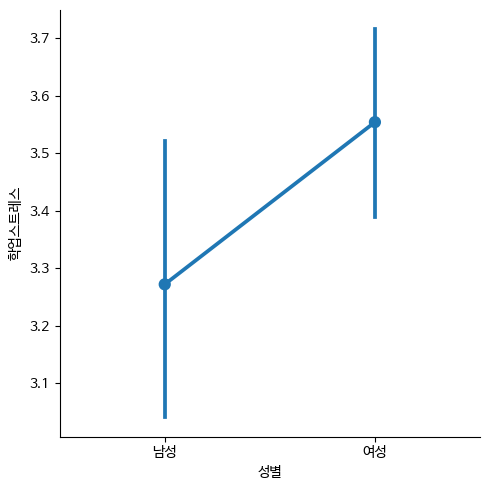

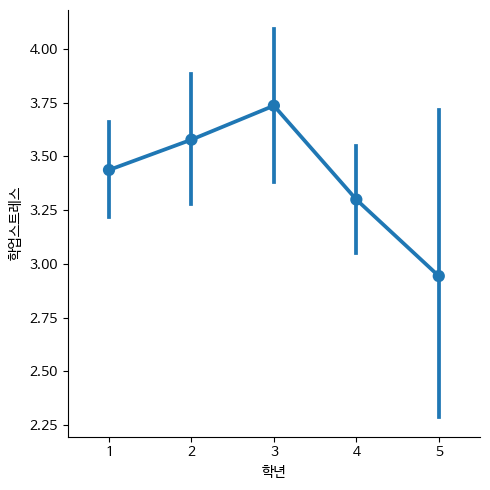

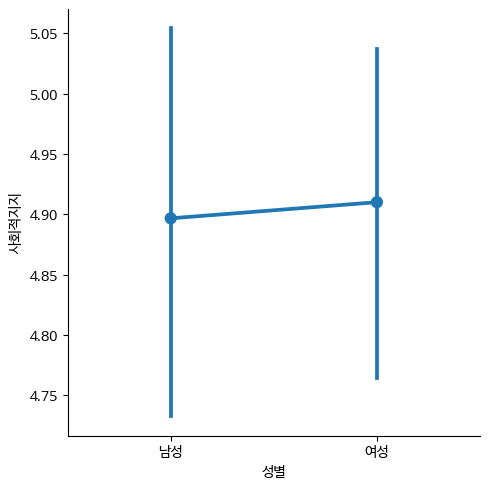

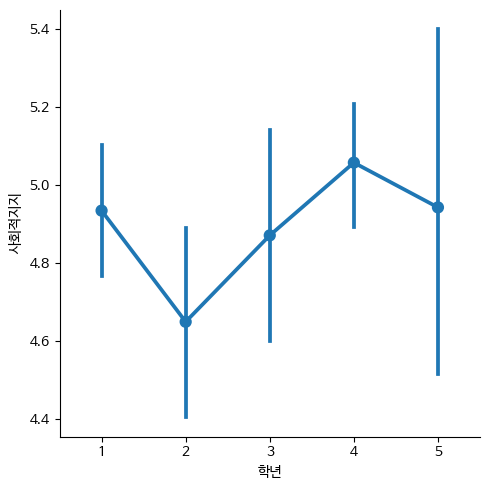

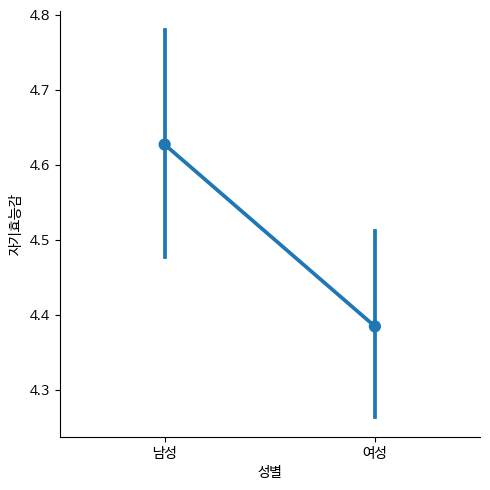

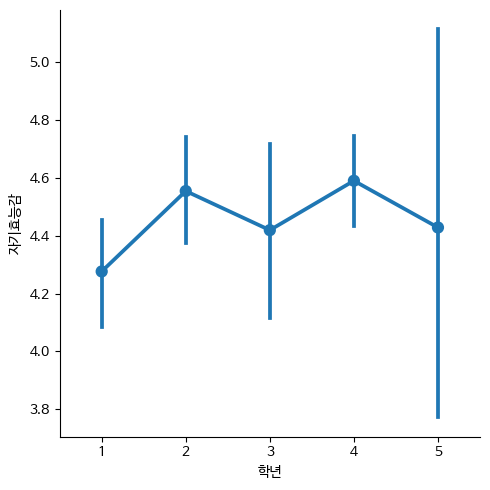

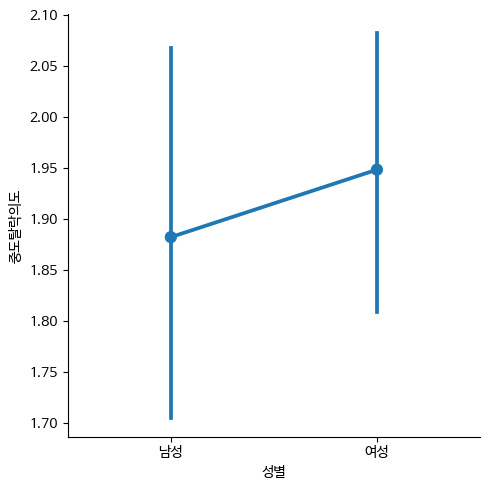

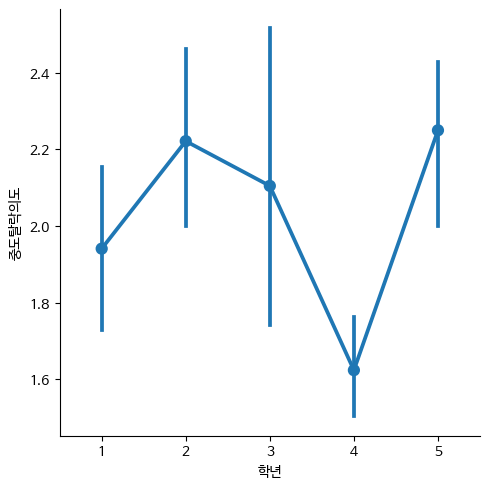

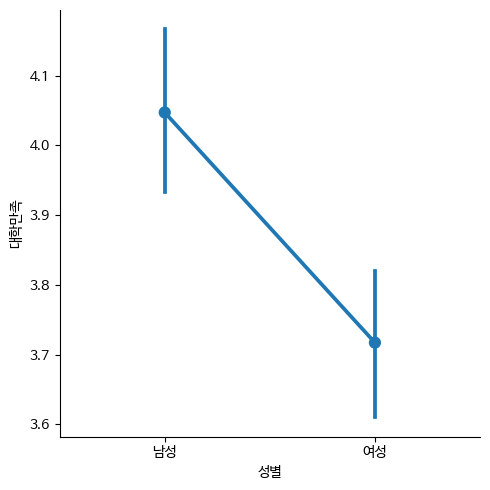

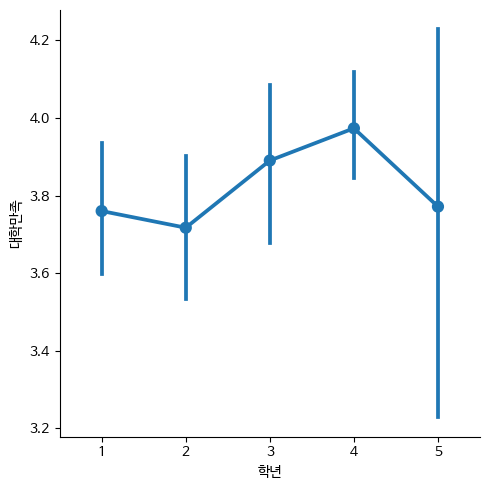

In [ ]:
sns.catplot(x='성별', y='학업스트레스', kind='point', data=data)
sns.catplot(x='학년', y='학업스트레스', kind='point', data=data)
sns.catplot(x='성별', y='사회적지지', kind='point', data=data)
sns.catplot(x='학년', y='사회적지지', kind='point', data=data)
sns.catplot(x='성별', y='자기효능감', kind='point', data=data)
sns.catplot(x='학년', y='자기효능감', kind='point', data=data)
sns.catplot(x='성별', y='중도탈락의도', kind='point', data=data)
sns.catplot(x='학년', y='중도탈락의도', kind='point', data=data)
sns.catplot(x='성별', y='대학만족', kind='point', data=data)
sns.catplot(x='학년', y='대학만족', kind='point', data=data)

##3.2 빈도 시각화


###성별

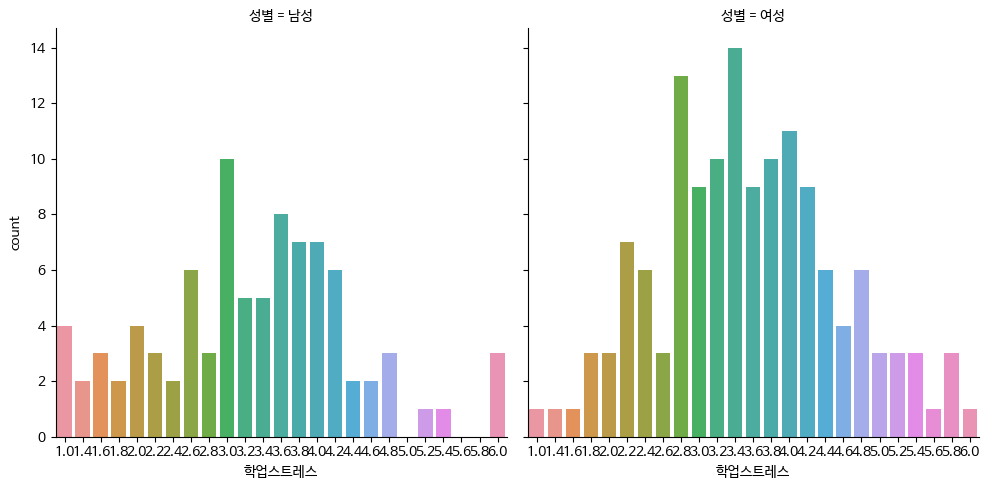

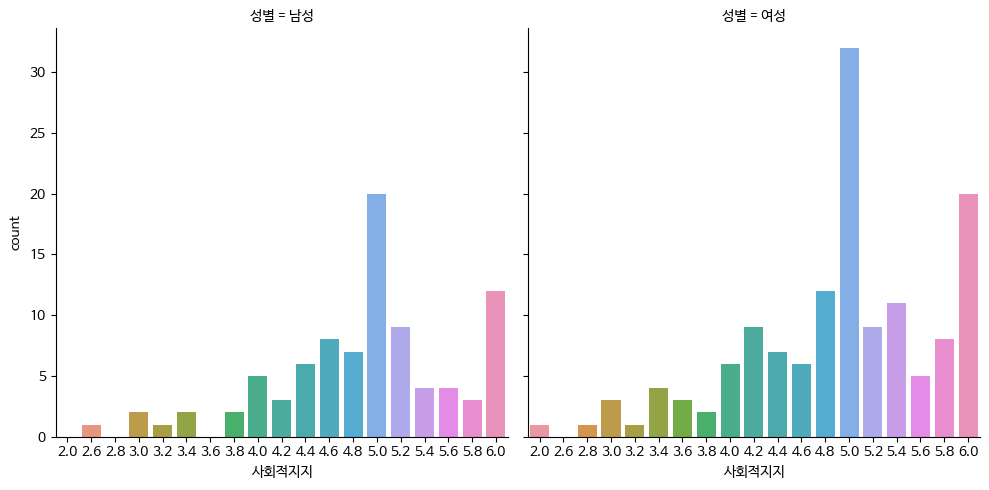

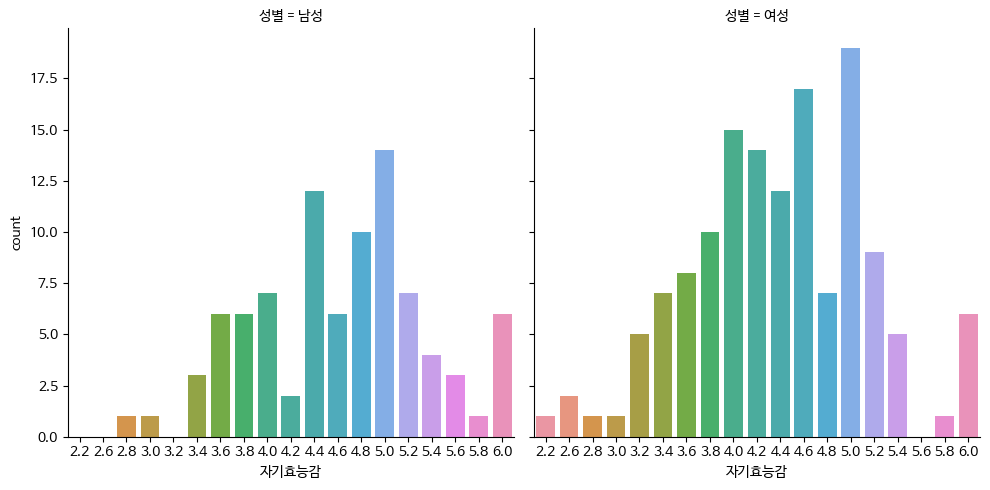

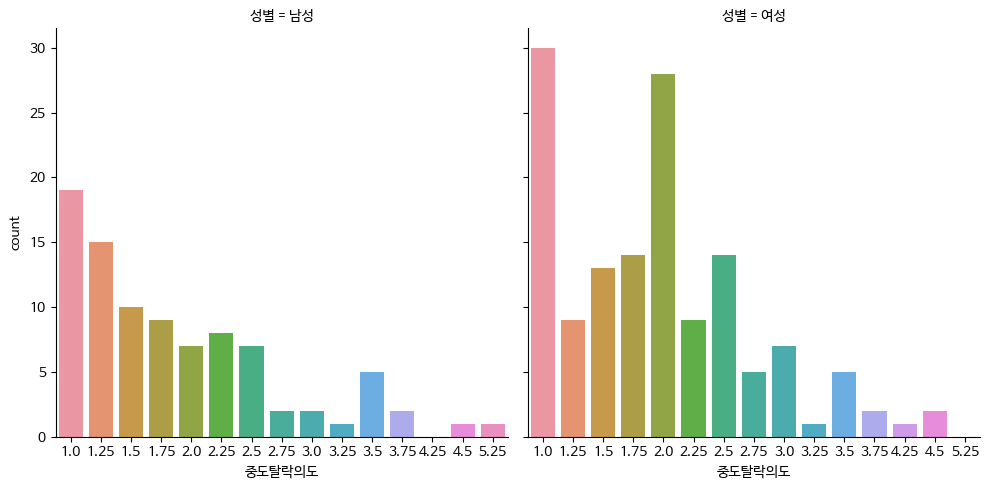

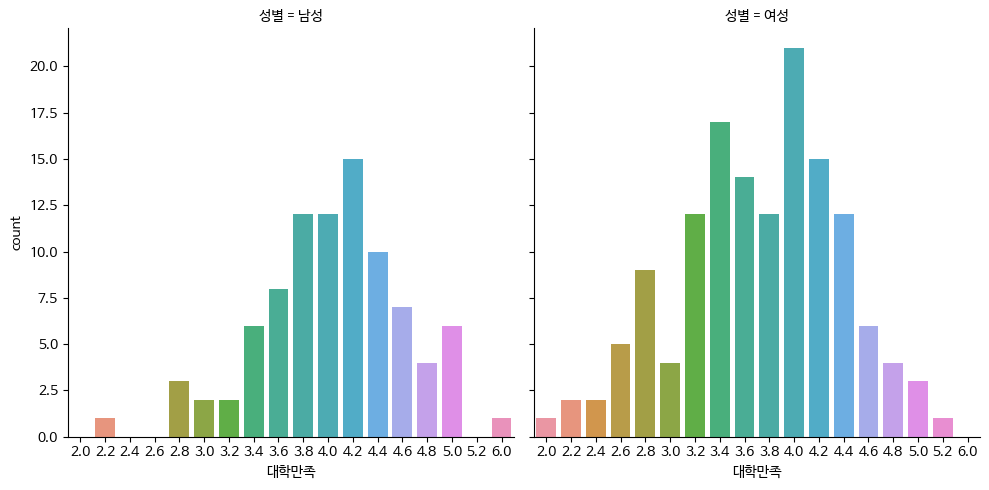

In [ ]:
sns.catplot(x='학업스트레스',
            col='성별',   # 캔버스 분리하기
            kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='사회적지지',
            col='성별',   # 캔버스 분리하기
            kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='자기효능감',
            col='성별',   # 캔버스 분리하기
            kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='중도탈락의도',
            col='성별',   # 캔버스 분리하기
            kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='대학만족',
            col='성별',   # 캔버스 분리하기
             kind='count', # 빈도 막대그래프 그리기
            data=data)

###학년별

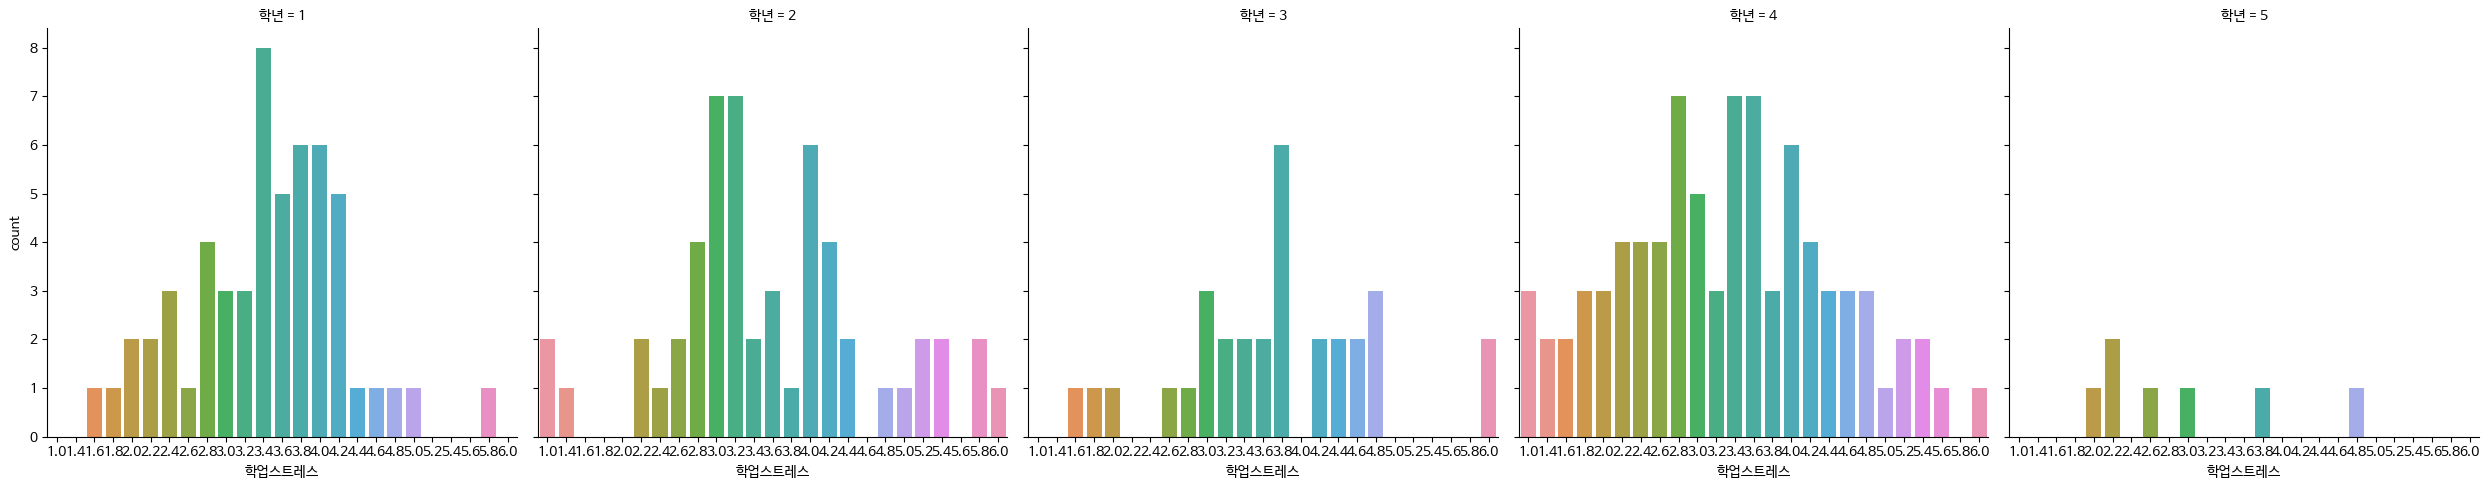

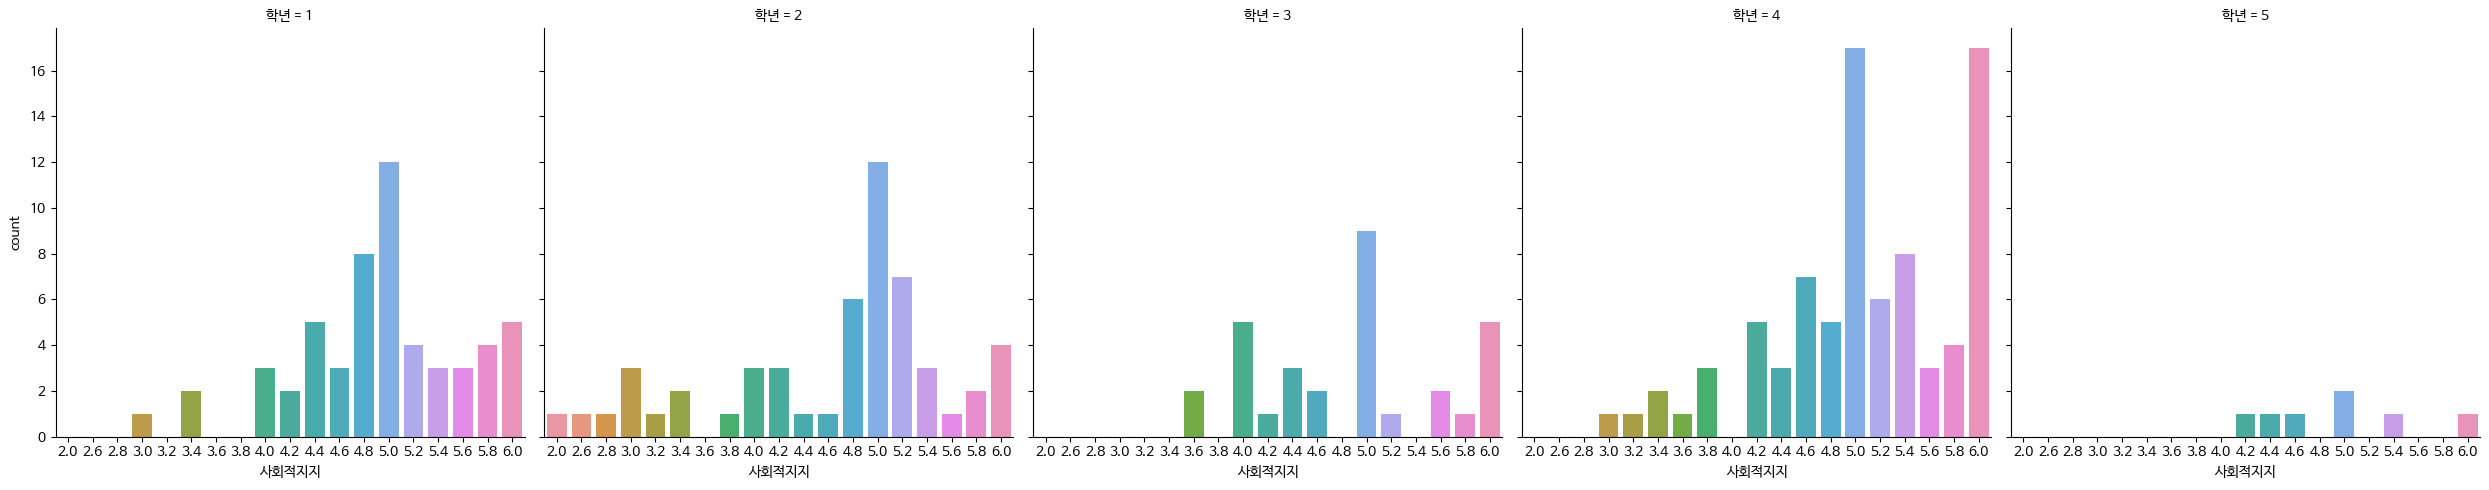

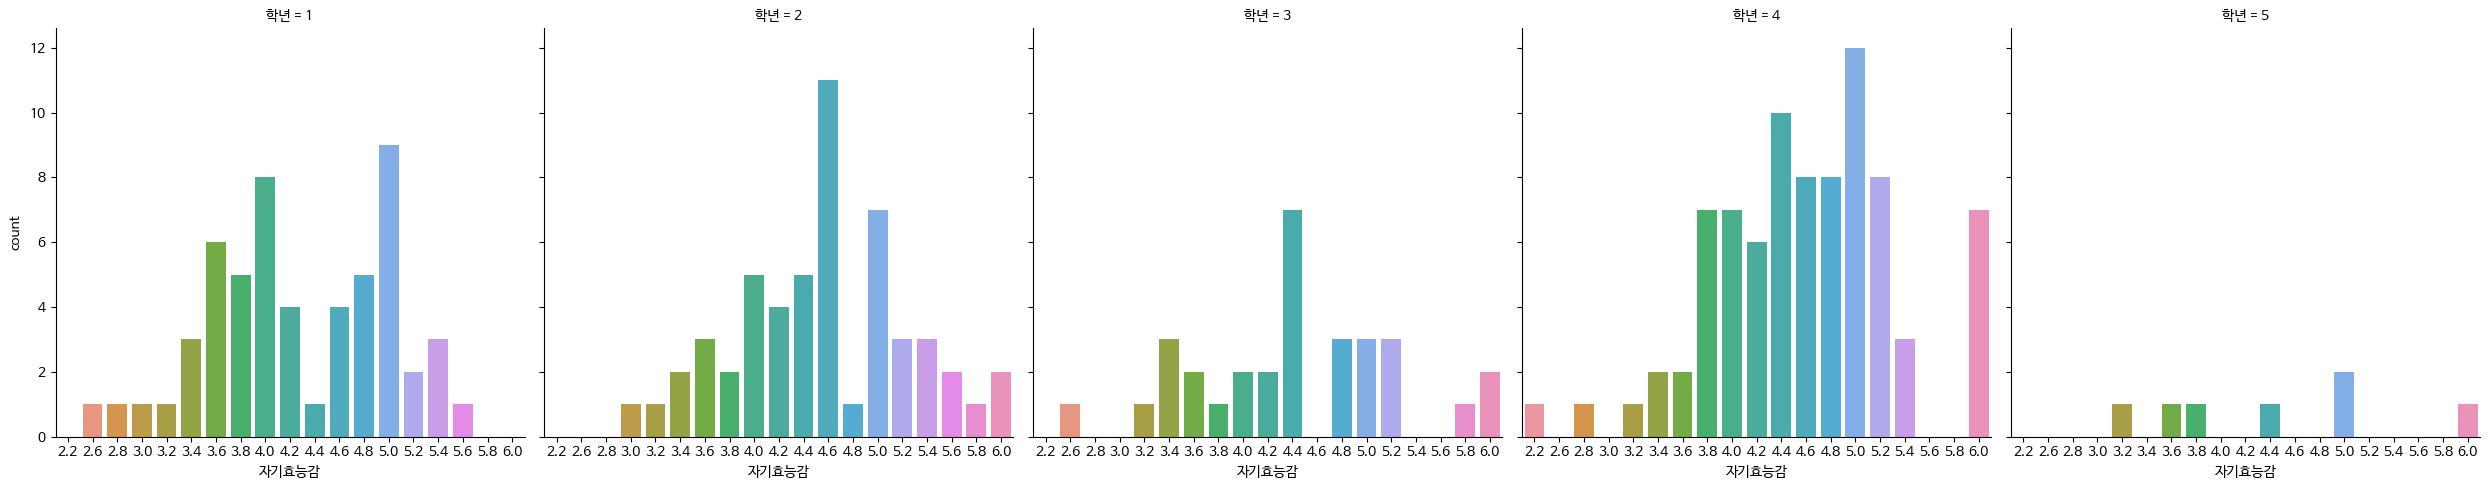

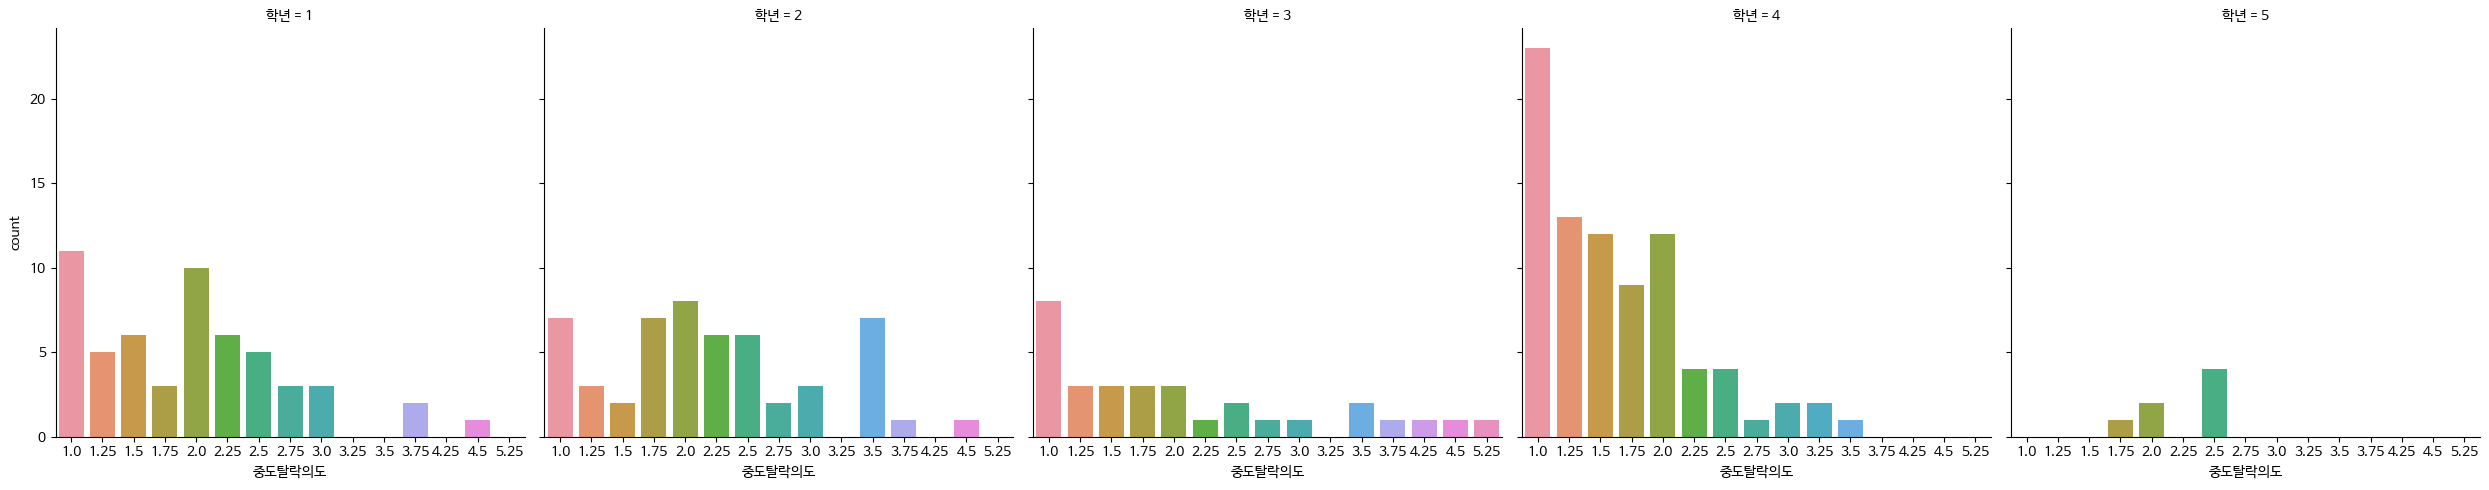

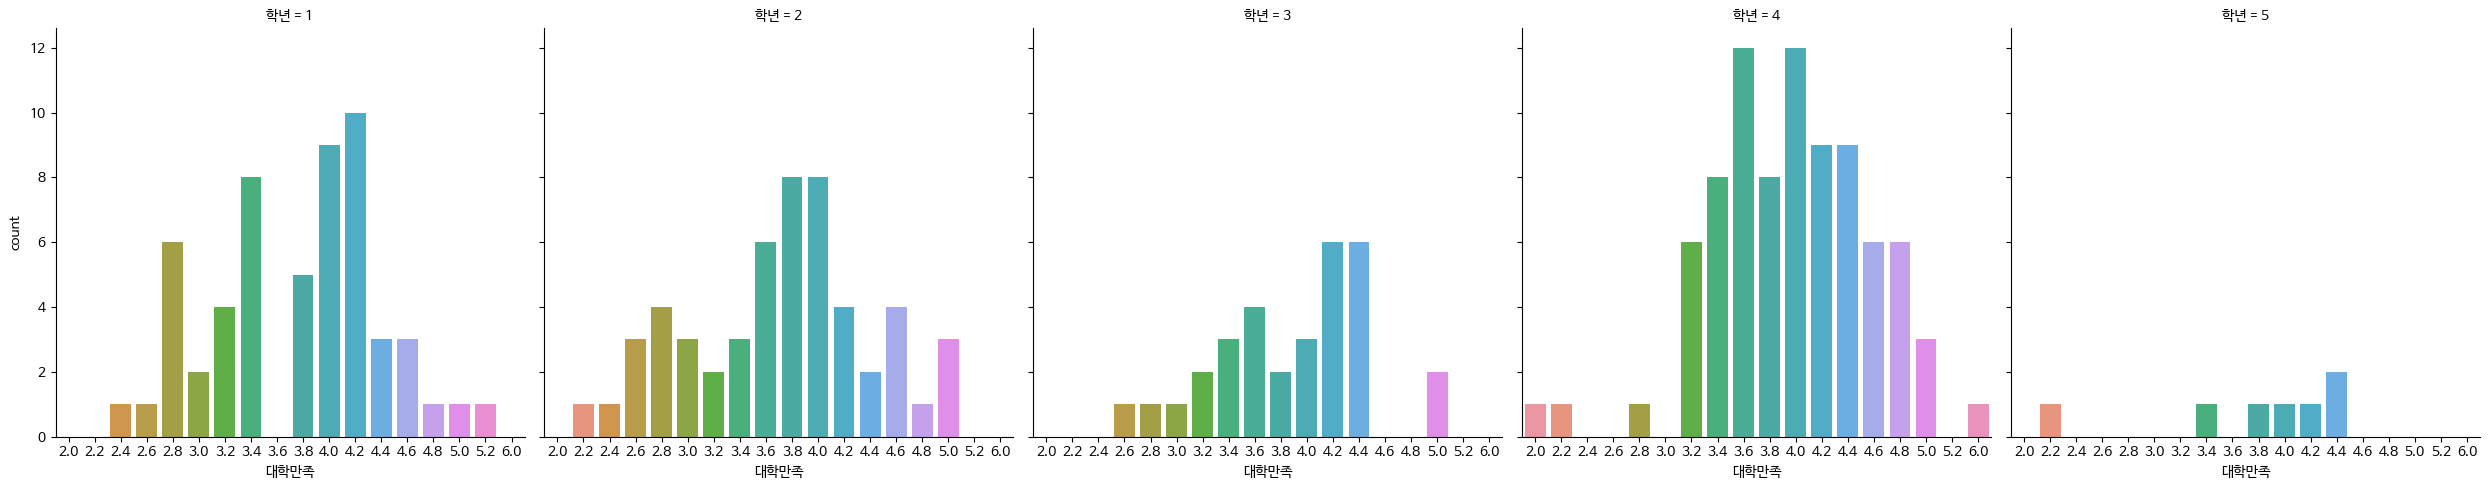

In [ ]:
sns.catplot(x='학업스트레스',
            col='학년',   # 캔버스 분리하기
             kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='사회적지지',
            col='학년',   # 캔버스 분리하기
             kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='자기효능감',
            col='학년',   # 캔버스 분리하기
             kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='중도탈락의도',
            col='학년',   # 캔버스 분리하기
             kind='count', # 빈도 막대그래프 그리기
            data=data)
sns.catplot(x='대학만족',
            col='학년',   # 캔버스 분리하기
             kind='count', # 빈도 막대그래프 그리기
            data=data)

##3.3 상관관계 시각화

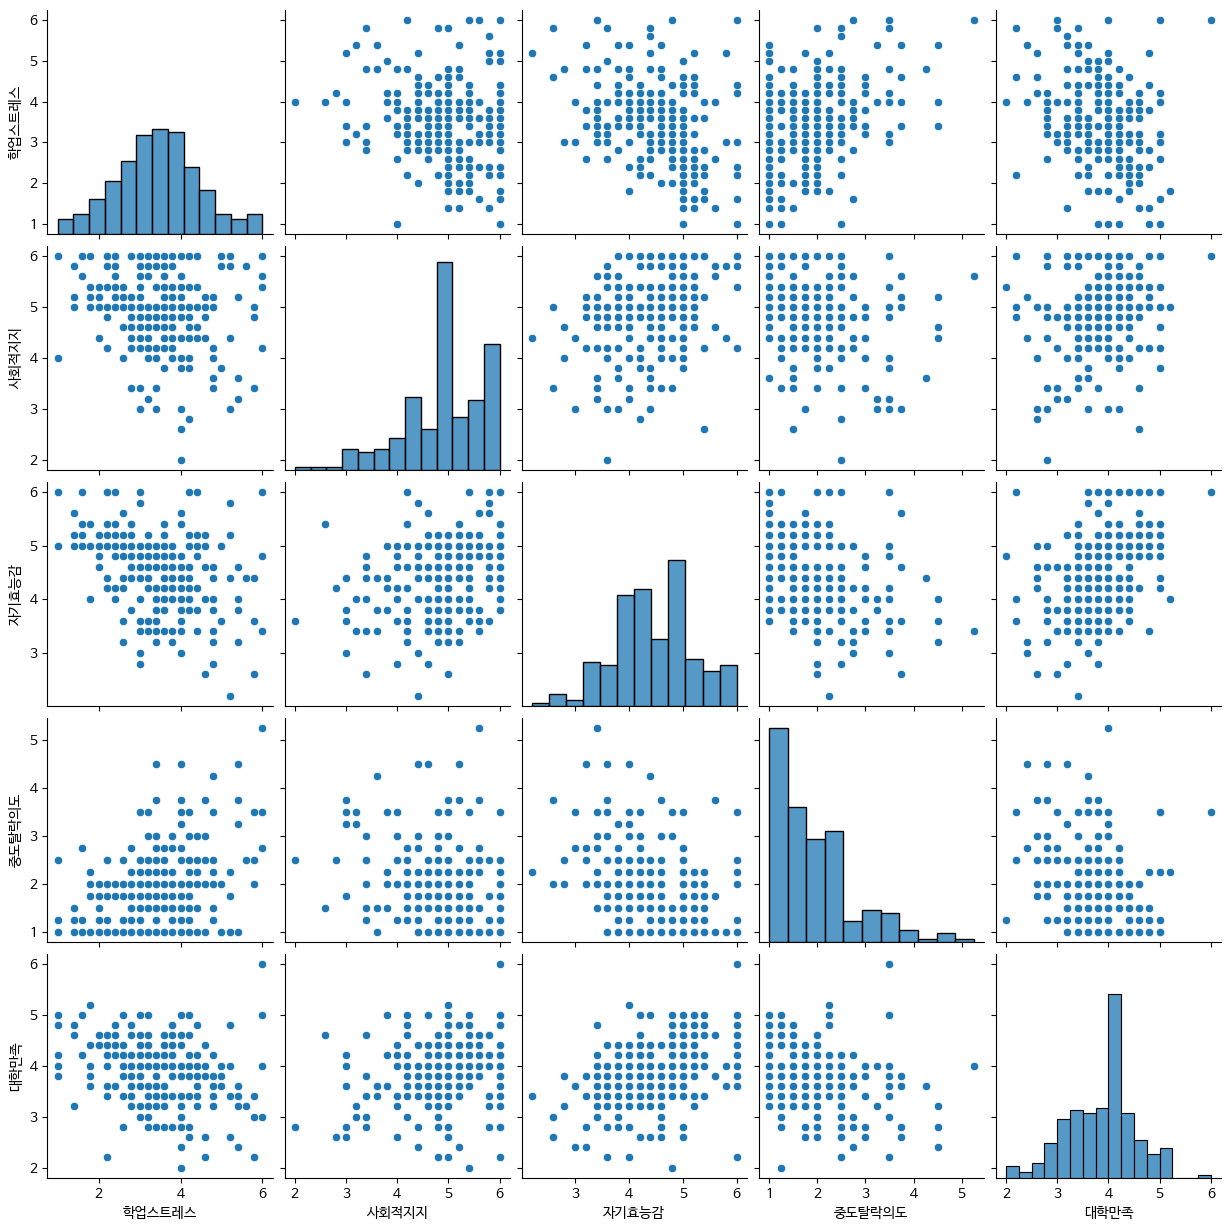

In [ ]:
sns.pairplot(data[['학업스트레스','사회적지지','자기효능감','중도탈락의도','대학만족']],
             diag_kind='hist')
plt.show()

#4. 독립표본 t-검정 실시
* 남학생 vs 여학생
* 저학년 (1,2학년) vs 고학년 (3학년이상)

##4.1. 남학생 vs 여학생

In [ ]:
print('남학생 vs 여학생 학업스트레스 t-test 결과:', stats.ttest_ind(male['학업스트레스'], female['학업스트레스'], equal_var=True))
print('남학생 vs 여학생 사회적지지   t-test 결과:', stats.ttest_ind(male['사회적지지'], female['사회적지지'], equal_var=True))
print('남학생 vs 여학생 자기효능감   t-test 결과:', stats.ttest_ind(male['자기효능감'], female['자기효능감'], equal_var=True))
print('남학생 vs 여학생 중도탈락의도 t-test 결과:', stats.ttest_ind(male['중도탈락의도'], female['중도탈락의도'], equal_var=True))
print('남학생 vs 여학생 대학만족     t-test 결과:', stats.ttest_ind(male['대학만족'], female['대학만족'], equal_var=True))

남학생 vs 여학생 학업스트레스 t-test 결과: TtestResult(statistic=-1.974506248684556, pvalue=0.0495364413840804, df=227.0)
남학생 vs 여학생 사회적지지   t-test 결과: TtestResult(statistic=-0.12436996618378911, pvalue=0.901132413353096, df=227.0)
남학생 vs 여학생 자기효능감   t-test 결과: TtestResult(statistic=2.4071155566505777, pvalue=0.016878832893920812, df=227.0)
남학생 vs 여학생 중도탈락의도 t-test 결과: TtestResult(statistic=-0.5823423725801914, pvalue=0.5609140417330123, df=227.0)
남학생 vs 여학생 대학만족     t-test 결과: TtestResult(statistic=3.8408959146646056, pvalue=0.00015907460093465763, df=227.0)


##4.2. 저학년 (1,2학년) vs 고학년 (3학년이상)

In [ ]:
print('저학년 vs 고학년 학업스트레스 t-test 결과:', stats.ttest_ind(lowclass['학업스트레스'], highclass['학업스트레스'], equal_var=True))
print('저학년 vs 고학년 사회적지지   t-test 결과:', stats.ttest_ind(lowclass['사회적지지'], highclass['사회적지지'], equal_var=True))
print('저학년 vs 고학년 자기효능감   t-test 결과:', stats.ttest_ind(lowclass['자기효능감'], highclass['자기효능감'], equal_var=True))
print('저학년 vs 고학년 중도탈락의도 t-test 결과:', stats.ttest_ind(lowclass['중도탈락의도'], highclass['중도탈락의도'], equal_var=True))
print('저학년 vs 고학년 대학만족     t-test 결과:', stats.ttest_ind(lowclass['대학만족'], highclass['대학만족'], equal_var=True))

저학년 vs 고학년 학업스트레스 t-test 결과: TtestResult(statistic=0.8211135406927244, pvalue=0.4124430940103604, df=227.0)
저학년 vs 고학년 사회적지지   t-test 결과: TtestResult(statistic=-2.0070913534057837, pvalue=0.045925756960935954, df=227.0)
저학년 vs 고학년 자기효능감   t-test 결과: TtestResult(statistic=-1.2503775853280048, pvalue=0.21244903573525536, df=227.0)
저학년 vs 고학년 중도탈락의도 t-test 결과: TtestResult(statistic=2.7042864860169775, pvalue=0.0073636997466376, df=227.0)
저학년 vs 고학년 대학만족     t-test 결과: TtestResult(statistic=-2.3565804844070963, pvalue=0.01929499260664785, df=227.0)


#5. 피어슨 상관분석 실시

In [ ]:
print('학업스트레스-사회적지지 상관분석 결과:   ', stats.pearsonr(data.학업스트레스.values, data.사회적지지.values))
print('학업스트레스-자기효능감 상관분석 결과:   ',stats.pearsonr(data.학업스트레스.values, data.자기효능감.values))
print('학업스트레스-중도탈락의도 상관분석 결과: ',stats.pearsonr(data.학업스트레스.values, data.중도탈락의도.values))
print('학업스트레스-대학만족 상관분석 결과:     ',stats.pearsonr(data.학업스트레스.values, data.대학만족.values))
print('사회적지지-자기효능감 상관분석 결과:     ',stats.pearsonr(data.사회적지지.values, data.자기효능감.values))
print('사회적지지-중도탈락의도 상관분석 결과:   ',stats.pearsonr(data.사회적지지.values, data.중도탈락의도.values))
print('사회적지지-대학만족 상관분석 결과:       ',stats.pearsonr(data.사회적지지.values, data.대학만족.values))
print('자기효능감-중도탈락의도 상관분석 결과:   ',stats.pearsonr(data.자기효능감.values, data.중도탈락의도.values))
print('자기효능감-대학만족 상관분석 결과:       ',stats.pearsonr(data.자기효능감.values, data.대학만족.values))
print('중도탈락의도-대학만족 상관분석 결과:     ',stats.pearsonr(data.중도탈락의도.values, data.대학만족.values))

학업스트레스-사회적지지 상관분석 결과:    PearsonRResult(statistic=-0.22695957271251696, pvalue=0.0005381691266339268)
학업스트레스-자기효능감 상관분석 결과:    PearsonRResult(statistic=-0.3839980255837037, pvalue=1.8416745658987914e-09)
학업스트레스-중도탈락의도 상관분석 결과:  PearsonRResult(statistic=0.3720423230063663, pvalue=6.281548131206508e-09)
학업스트레스-대학만족 상관분석 결과:      PearsonRResult(statistic=-0.29993869513362575, pvalue=3.820948282801388e-06)
사회적지지-자기효능감 상관분석 결과:      PearsonRResult(statistic=0.35783849076964036, pvalue=2.5326158748809063e-08)
사회적지지-중도탈락의도 상관분석 결과:    PearsonRResult(statistic=-0.3584276017802599, pvalue=2.3935250750615123e-08)
사회적지지-대학만족 상관분석 결과:        PearsonRResult(statistic=0.2414324066406344, pvalue=0.0002257997077147507)
자기효능감-중도탈락의도 상관분석 결과:    PearsonRResult(statistic=-0.3953212373494948, pvalue=5.500164903993596e-10)
자기효능감-대학만족 상관분석 결과:        PearsonRResult(statistic=0.42980324431280903, pvalue=1.034764062496444e-11)
중도탈락의도-대학만족 상관분석 결과:      PearsonRResult(statistic=-0.321812104866369, pvalue=6.482